# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [1]:
# initial imports
import os
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

pn.extension("plotly")

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [3]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [4]:
# Getting the data from the top 10 expensive neighbourhoods
to_data_2016 = to_data.reset_index()
to_data_2016 = to_data_2016.loc[to_data_2016["year"]==2016]
to_data_2016_top_10 = to_data_2016.nlargest(10,["average_house_value"])
to_data_2016_top_10 = to_data_2016_top_10.drop(columns=["single_detached_house",
                                                        "apartment_five_storeys_plus", 
                                                        "movable_dwelling", 
                                                        "semi_detached_house", 
                                                        "row_house", 
                                                        "duplex", 
                                                        "apartment_five_storeys_less",
                                                        "other_house", 
                                                        "shelter_costs_owned",
                                                        "shelter_costs_rented",
                                                       ]
                                              )

#to_data_2016_top_10

# Calculate the mean number of dwelling types units per year
data_avg = to_data.reset_index()
data_avg = to_data.groupby("neighbourhood").mean().reset_index()
#data_avg = data_avg.drop(columns=["Total Number of dwellings", "Total Value"]).reset_index()
#data_avg.head()

# Calculate the average monthly shelter costs for owned and rented dwellings
to_data_shelter_costs = to_data.drop(columns=["neighbourhood",
                                              "single_detached_house",
                                              "apartment_five_storeys_plus", 
                                              "movable_dwelling", 
                                              "semi_detached_house", 
                                              "row_house", 
                                              "duplex", 
                                              "apartment_five_storeys_less",
                                              "other_house", 
                                              "average_house_value"])
to_data_shelter_costs = to_data_shelter_costs.groupby(to_data_shelter_costs.index).mean()
#to_data_shelter_costs

#Mean number with coordinates
data_avg_coordinates = pd.concat([data_avg,df_neighbourhood_locations], axis="columns", join="inner")
data_avg_coordinates = data_avg_coordinates.loc[:,~data_avg_coordinates.columns.duplicated()]
data_avg_coordinates = data_avg_coordinates[['neighbourhood',
                                            'lat',
                                            'lon',
                                            'single_detached_house',
                                            'apartment_five_storeys_plus',
                                            'movable_dwelling',
                                            'semi_detached_house',
                                            'row_house',
                                            'duplex',
                                            'apartment_five_storeys_less',
                                            'other_house',
                                            'average_house_value',
                                            'shelter_costs_owned',
                                            'shelter_costs_rented',
                                           ]]

##CALCULATE YEARLY BAR CHARTS:
# Calculate the number of dwelling types units per year (hint: use groupby and sum)
to_data_year = to_data.groupby(to_data.index).sum()
to_data_year = to_data_year.drop(columns=["average_house_value", 
                                         "shelter_costs_owned", 
                                         "shelter_costs_rented"])
to_data_year

# Create a new DataFrame with the mean house values by neighbourhood per year
to_data_by_area = to_data[["neighbourhood","average_house_value"]]
to_data_by_area.head()

# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
to_data_by_area_year = to_data_by_area.reset_index()

##NUMBER OF DWELLING TYPES
# Fetch the data of all dwelling types per year
to_data_no_index = to_data.reset_index()
to_data_no_index = to_data_no_index.drop(columns=["average_house_value",
                                                "shelter_costs_owned",
                                                "shelter_costs_rented"
                                                 ])
##TOP 10 MOST EXPENSIVE NEIGHBOURHOODS
# Getting the data from the top 10 expensive neighbourhoods
to_data_2016 = to_data.reset_index()
to_data_2016 = to_data_2016.loc[to_data_2016["year"]==2016]
to_data_2016_top_10 = to_data_2016.nlargest(10,["average_house_value"])
to_data_2016_top_10 = to_data_2016_top_10.drop(columns=["single_detached_house",
                                                        "apartment_five_storeys_plus", 
                                                        "movable_dwelling", 
                                                        "semi_detached_house", 
                                                        "row_house", 
                                                        "duplex", 
                                                        "apartment_five_storeys_less",
                                                        "other_house", 
                                                        "shelter_costs_owned",
                                                        "shelter_costs_rented"
                                                       ]
                                              )


### Panel Visualization Functions

In [5]:
# Define Panel visualization functions
def neighbourhood_map():
    px.scatter_mapbox(
    data_avg_coordinates,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    hover_name = "neighbourhood",
    hover_data = data_avg_coordinates,
    zoom=9,
    title= "Average House Values in Toronto"
    )



def create_bar_chart(data, title, xlabel, ylabel, color):
    plt.subplots(figsize=(10,5))
    data.plot.bar(color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontdict={'fontsize':'18','fontweight':'bold'})


def create_line_chart(data, title, xlabel, ylabel, color):
    plt.subplots(figsize=(20,10))
    plt.plot(data, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontdict={'fontsize':'18','fontweight':'bold'})


def average_house_value():
    plt.subplots(figsize=(20,10))
    plt.plot(to_data_avg_value.iloc[0:,3], color="blue")
    plt.xlabel("Year")
    plt.ylabel("Avg House Value")
    plt.title("Average House Value in Toronto", fontdict={'fontsize':'18','fontweight':'bold'})


def average_value_by_neighbourhood():
    to_data_by_area_year.hvplot(x="year", 
                                y='average_house_value', 
                                groupby='neighbourhood', 
                                kind='line').opts(yformatter="%.0f")

def number_dwelling_types():
    to_data_no_index.hvplot.bar(x="year",
                                groupby="neighbourhood",
                                rot=90,
                                height=600,
                                xlabel="Year",
                                ylabel="Dwelling Type Units")

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!

def top_most_expensive_neighbourhoods():
    to_data_2016_top_10.hvplot.bar(x="neighbourhood",
                                   y="average_house_value",
                                   rot=90,
                                   height=600,
                                   title="Top 10 Expensive Neighbourhoods in Toronto",
                                   xlabel="Neighbourhood",
                                   ylabel="Avg. House Value"
                                  ).opts(yformatter="%.0f")

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [12]:
# Create a Title for the Dashboard
title = "Toronto Real Estate Analysis 2001-2016"

# Define a welcome text
welcome_text = "# Welcome to David Savage's Toronto Real Estate Analysis. Please review each tab carefully"

# Create a tab layout for the dashboard
"""
tab_1 = pn.Column(
    welcome_text,
    neighbourhood_map())

tab_2_a = pn.Row(create_bar_chart(to_data_year.iloc[0], 
                 "Dwelling Types in Toronto in 2001", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "red"), create_bar_chart(to_data_year.iloc[1], 
                 "Dwelling Types in Toronto in 2006", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "blue"))
tab_2_b = pn.Row(create_bar_chart(to_data_year.iloc[2], 
                 "Dwelling Types in Toronto in 2011", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "gold"), create_bar_chart(to_data_year.iloc[3], 
                 "Dwelling Types in Toronto in 2016", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "violet"))
tab_2 = pn.Column(tab_2_a, tab_2_b)
"""

'\ntab_1 = pn.Column(\n    welcome_text,\n    neighbourhood_map())\n\ntab_2_a = pn.Row(create_bar_chart(to_data_year.iloc[0], \n                 "Dwelling Types in Toronto in 2001", \n                 "Dwelling Types in Toronto", \n                 "Dwelling Type Units",\n                 "red"), create_bar_chart(to_data_year.iloc[1], \n                 "Dwelling Types in Toronto in 2006", \n                 "Dwelling Types in Toronto", \n                 "Dwelling Type Units",\n                 "blue"))\ntab_2_b = pn.Row(create_bar_chart(to_data_year.iloc[2], \n                 "Dwelling Types in Toronto in 2011", \n                 "Dwelling Types in Toronto", \n                 "Dwelling Type Units",\n                 "gold"), create_bar_chart(to_data_year.iloc[3], \n                 "Dwelling Types in Toronto in 2016", \n                 "Dwelling Types in Toronto", \n                 "Dwelling Type Units",\n                 "violet"))\ntab_2 = pn.Column(tab_2_a, tab_2_b)\n'

In [13]:
# Create the main dashboard
dashboard = pn.Tabs(
    ("Welcome", pn.Column(
    welcome_text,
    neighbourhood_map())),
    ("Year by Year Analysis", tab_2))
dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(None)
    [1] Column
        [0] Row
            [0] Str(None)
            [1] Str(None)
        [1] Row
            [0] Str(None)
            [1] Str(None)

## Serve the Panel Dashboard

In [11]:
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(None)
    [1] Column
        [0] Row
            [0] Str(None)
            [1] Str(None)
        [1] Row
            [0] Str(None)
            [1] Str(None)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

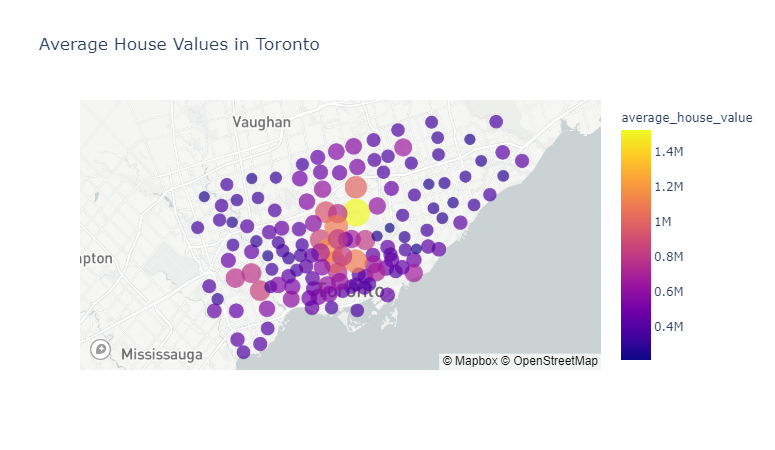

AttributeError: 'NoneType' object has no attribute 'show'

In [29]:
neighbourhood_map().show()

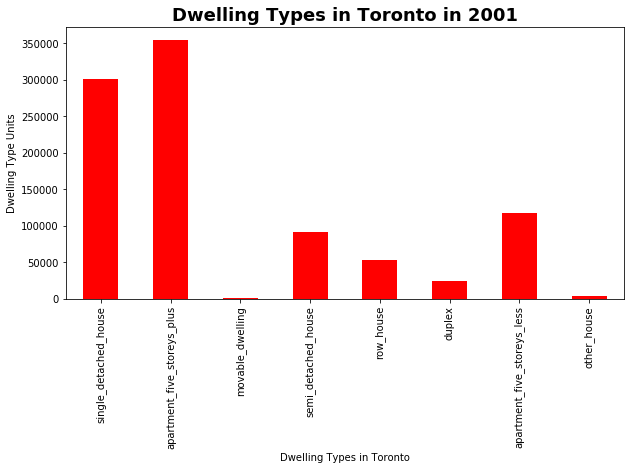

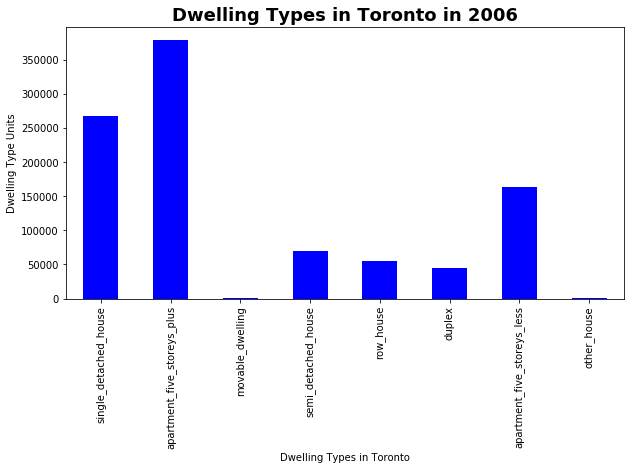

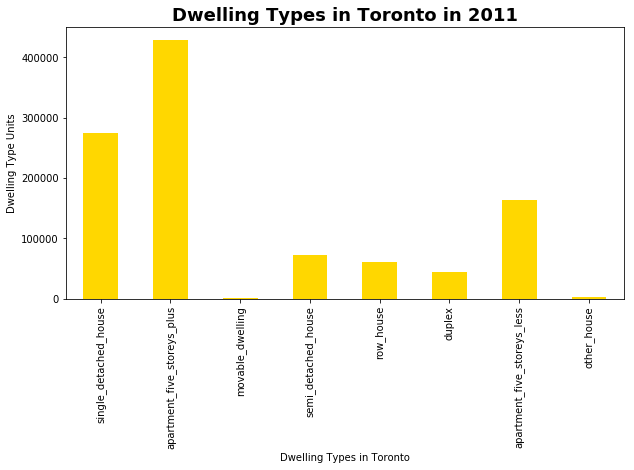

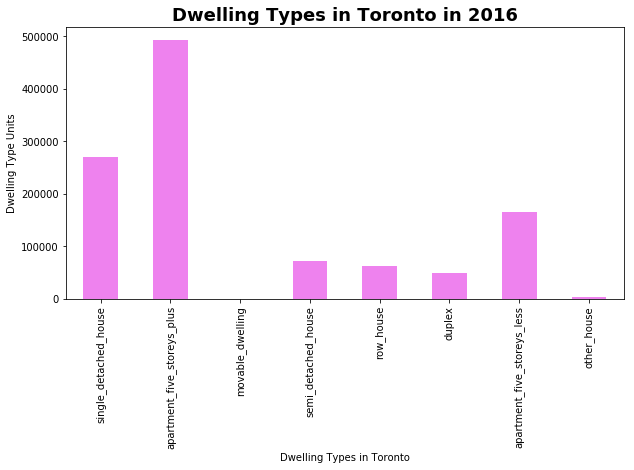

In [32]:
#create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
create_bar_chart(to_data_year.iloc[0], 
                 "Dwelling Types in Toronto in 2001", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "red")
# # Bar chart for 2006
create_bar_chart(to_data_year.iloc[1], 
                 "Dwelling Types in Toronto in 2006", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "blue")
# # Bar chart for 2011
create_bar_chart(to_data_year.iloc[2], 
                 "Dwelling Types in Toronto in 2011", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "gold")
# # Bar chart for 2016
create_bar_chart(to_data_year.iloc[3], 
                 "Dwelling Types in Toronto in 2016", 
                 "Dwelling Types in Toronto", 
                 "Dwelling Type Units",
                 "violet")

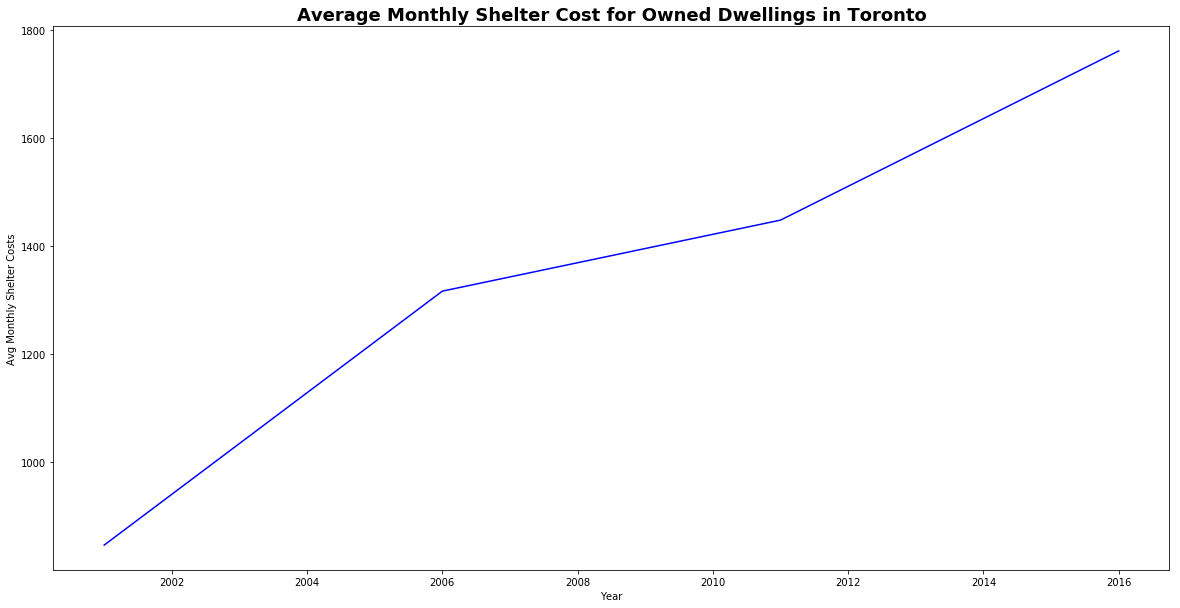

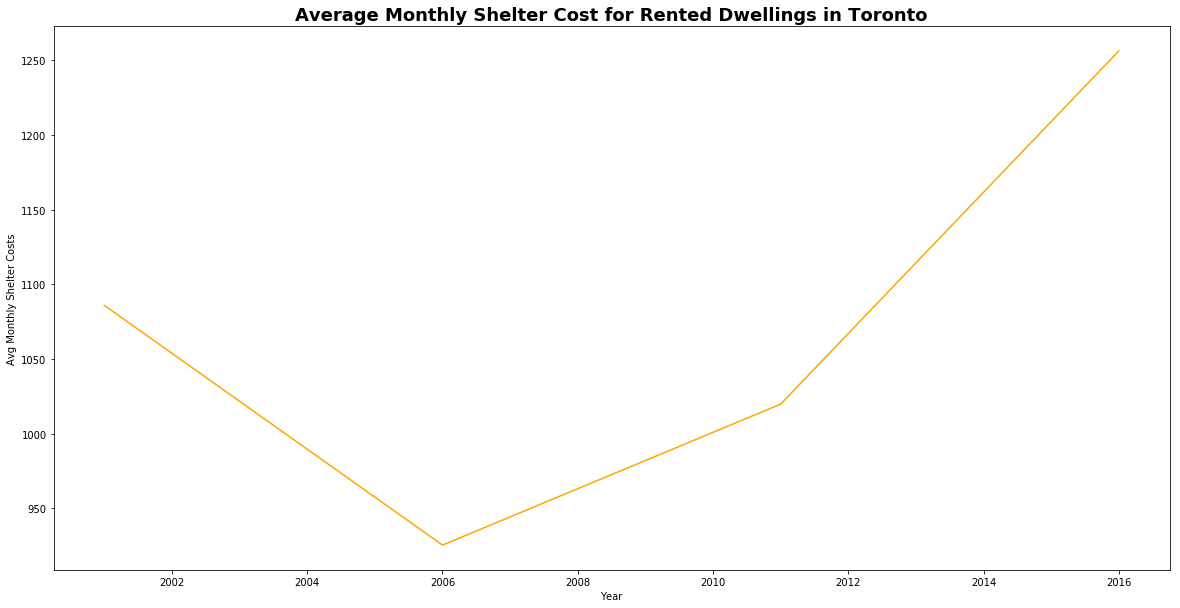

In [33]:
# create_line_chart(data, title, xlabel, ylabel, color)
# Line chart for owned dwellings
create_line_chart(to_data_shelter_costs.iloc[0:,0],
                  "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
                  "Year", 
                  "Avg Monthly Shelter Costs",
                  "blue")

# Line chart for rented dwellings
create_line_chart(to_data_shelter_costs.iloc[0:,1],
                  "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
                  "Year", 
                  "Avg Monthly Shelter Costs",
                  "orange")

NameError: name 'to_data_avg_value' is not defined

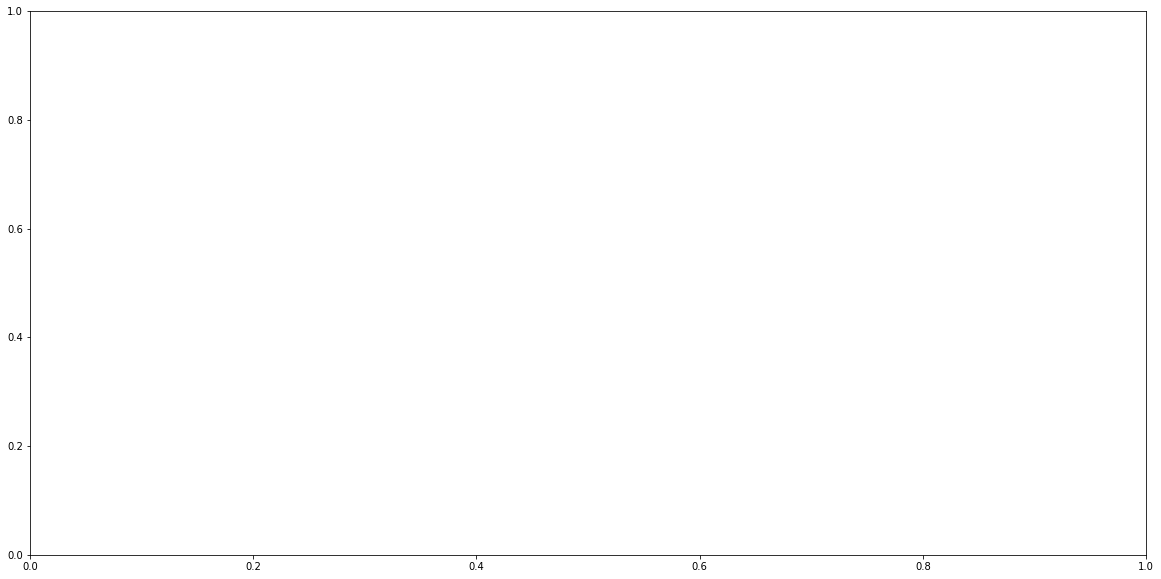

In [11]:
average_house_value()

In [37]:
print(average_value_by_neighbourhood())

None


In [38]:
number_dwelling_types()

In [39]:
average_house_value_snapshot()

In [40]:
top_most_expensive_neighbourhoods()

In [17]:
# sunburts_cost_analysis()